Question 1

In the original data, the standard deviation refers to the spread of the data points. It measures the average amount of variations between the data points and the mean. On the other hand, the standard error of mean is used to describe the bootstrapped sample means. It is affected by the randomness during bootstrapping the data, and shows the spread and variation of the bootstrapped means compared to the predicted population mean.

The standard deviation depicts how individual data from one sample may be sparead away from the mean. A higher standard deviation can mean that there exists some outliers, or the data is not distrubuted majorly around the mean. The standard error of mean is used to capture whether the bootstrapped sample means has provided an accurate estimate of the population mean. Due to the variablity in bootstrapping, a small dataset of bootstrapped means can lead to a higher standard error and be less accurate in reflecting the actual population mean. However, the standard error would decrease as the bootstrapped sample size grows larger.

Question 2

After collecting all the bootstrapped data, we can use the property of a normal distrubution to create a 95% confidence interval. As 95% of the data in a normal distrubution is within 2 standard deviations of the the mean, we can change it to 2 standard error of means away from the mean of the sample means. This will create a interval between (x-bar - 2 standard errrors) and (x-bar + 2 standard errors), which contains 95% of the sample means.


Question 3

The code:

lower_bound = np.quantile(boot_means, 0.025)  # 2.5th percentile

upper_bound = np.quantile(boot_means, 0.975)  # 97.5th percentile

The above code creates a 95% confidence interval by ignoring the bottom 2.5% and top 2.5% data. The np.quantile function takes an ordered array and a percentage as the parameter. Here, assume boot_mean is the ordered array of all of our bootstrapped sample means, we can use 0.025 as the 2.5th percentile and 0.975 as the 97.5th percentile to give us the data with in the 95% interval.

Question 4

In [8]:
import numpy as np

# We can use the random.seed to produce the same result again, in case if we want to replicate the test.
# np.random.seed(42)

# Randomly generate a dataset of size 10 by normal distrbution. The location (mean) is set to be 170 cm and scale(standard deviation)
# is set to be 10 cm.
sample_data = np.random.normal(loc=170, scale=10, size=10)

# Print the sample data
print("The sample height of 10 people:",sample_data)

# Define number of bootstraps
n_bootstraps = 10000

# Create an empty array to store the bootstrapped sample means. We should rename the variables if we are going to sample for
# different attributes such as sample median.
boot_means = np.empty(n_bootstraps)

# Run the bootstrapping for the defined amount of times
for i in range(n_bootstraps):
    boot_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)  # Sample with replacement
    boot_means[i] = np.mean(boot_sample)  # Compute the mean of the bootstrapped dataset. Use np.median if finding sample median

# Define the 95% confidence interval using np.quantile, as described in question 3. 
lower_bound_mean = np.quantile(boot_means, 0.025)  # 2.5th percentile
upper_bound_mean = np.quantile(boot_means, 0.975)  # 97.5th percentile

# Print the 95% confidence interval for the mean
print(f"95% confidence interval for the population mean: [{lower_bound_mean}, {upper_bound_mean}]")

# The below is an example to bootstrap for population median, as described by the previous comments
# Create an empty array to store the bootstrapped sample medians
# boot_medians = np.empty(n_bootstraps)

# Run the bootstrapping for the defined amount of times
# for i in range(n_bootstraps):
    # boot_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)  # Sample with replacement
    # boot_medians[i] = np.median(boot_sample)  # Compute the median of the resampled dataset

# Define the 95% confidence interval using np.quantile, as described in question 3
# lower_bound_median = np.quantile(boot_medians, 0.025)  # 2.5th percentile
# upper_bound_median = np.quantile(boot_medians, 0.975)  # 97.5th percentile

# Print the 95% confidence interval for the median
# print(f"95% confidence interval for the population median: [{lower_bound_median}, {upper_bound_median}]")


The sample height of 10 people: [177.3779375  167.99424684 173.61763548 178.66663904 161.58582264
 155.65564235 177.73496927 189.60207674 149.95935265 185.85575427]
95% confidence interval for the population mean: [163.96769408782848, 179.16405728038936]


Question 5

The population parameters are impossible to be accurately determined, and we can only collect sample statistics that has variability and randomness. When we are forming a confidence interval, our goal is to estimate the population parameter. We used 95% confidence interval to reduce the impact of the variablity in our samples, which then allowed us to say that the actual population parameter falls within our confidence interval in 95% of the times.

Question 6

__1.What is the process of bootstrapping?__

To perform bootstrapping, we need to begin with an initial sample dataset. Then, we try to create new samples of the same size using the original dataset. We can randomly choose the values that appeared in our initial dataset until a sample of the same size is made. Also during that process, one value can be chosen more than once, as well as some values can never be chosen into our bootstrapping sample, which we call this method sampling with replacements. After that, we compute for a parameter of the sample, such as the mean or median, and collect them into another dataset. We repeat this process of sampling and computing until we have enough samples, which we shall see that collected the parameters of the sample are usually slightly different from the initial dataset. Using the parameter data, we can produce a distrbution of it and analyze it .


__2.What is the main purpose of bootstrapping?__

The main goal of bootstrapping is to estimate the population parameter such as the mean while taking account of the uncertainty in the sample dataset. It is not always possible to get more samples to increase the reliability of our data, therefore bootstrapping gives us a chance to easily genereate more data without the loss of its variability. Also, by making a confidence interval, we can make an educated prediction of the population parameter without the need of extra infomation.


__3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?__

First, I would compare my guess with the calculated average from the sample. If it not completely off, then we can proceed to bootstrap the sample. Just like how we previously described, we can perform bootstrapping for thousands of time until we feel comfortable with the size the sample means. We should create a visualization of the distrubution of the sample means, like a histogram. Then we can calculate and label the 2.5th percentile and 97.5th percentile to create a 95% confidence interval. If our guess lands in the confidence interval of our bootstrapped sample means, mostly of the times our guess should match or be close to the actual population average. Else if our guess in outside of the confidence interval, for majority of the times we can believe that the guess is not plausible.

Question 7

Since the sample mean has variability, it is possible for the actual mean to be zero when the sample mean is not zero. Especially when we have zero within our confidence interval, which tells us that zero is a plasuible population mean. When we make a 95% confidence interval, in 95% of the scenarios, the population mean can be any value within the interval. Therefore if zero is included in the interval, it means that the drug may have no effect on average.

If we are going to reject the null hypothesis, then the confidence interval cannot overlap with zero, representing that zero is not a reliable result for the population mean. Adding on, if the confidence interval is above zero, then that tells the drug must have a positive effect on average, and vice versa.

Question 8

Problem: The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

To provide evidence and analysis on the vaccine's effectiveness, we can use bootstrapping. In the context of this question, a null hypothesis would be that the change of patients' health score is zero, meaning the vaccine has no effect to their health on average.

In [9]:
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('vaccine_data.csv', index=False)  # index=False to avoid writing row numbers

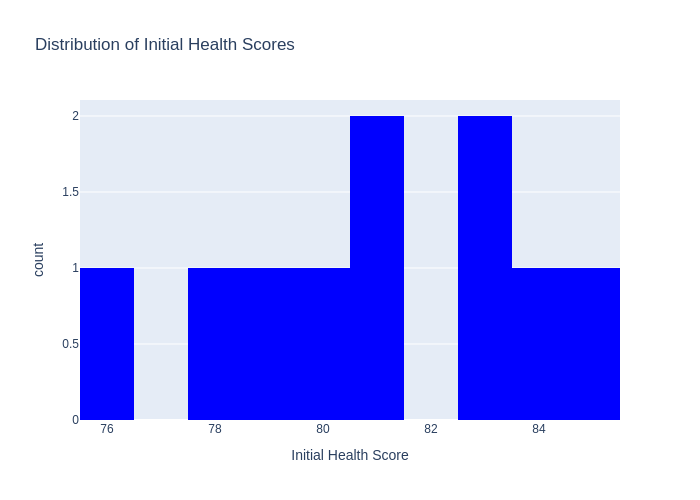

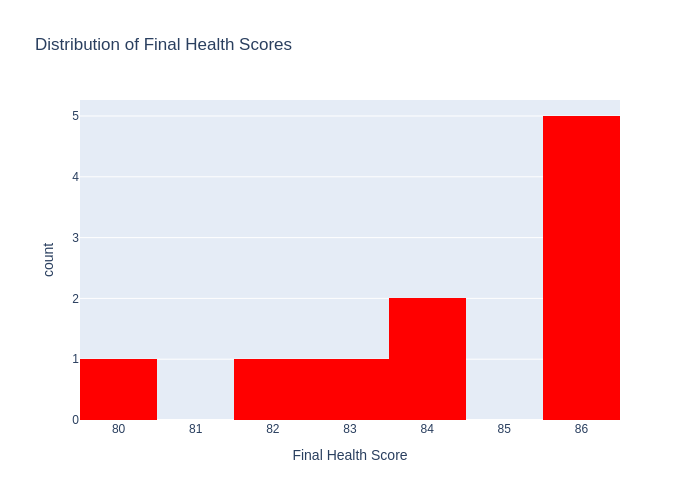

In [10]:
import plotly.express as px

# Read in the data
data = pd.read_csv('vaccine_data.csv')

# Create a histogram for Initial Health Scores
fig_initial = px.histogram(data, x="InitialHealthScore", nbins=10, title="Distribution of Initial Health Scores",
                           labels={'InitialHealthScore': 'Initial Health Score'}, color_discrete_sequence=['blue'])

# Create a histogram for Final Health Scores
fig_final = px.histogram(data, x="FinalHealthScore", nbins=10, title="Distribution of Final Health Scores",
                         labels={'FinalHealthScore': 'Final Health Score'}, color_discrete_sequence=['red'])

# Show the plots
fig_initial.show(renderer='png')
fig_final.show(renderer='png')


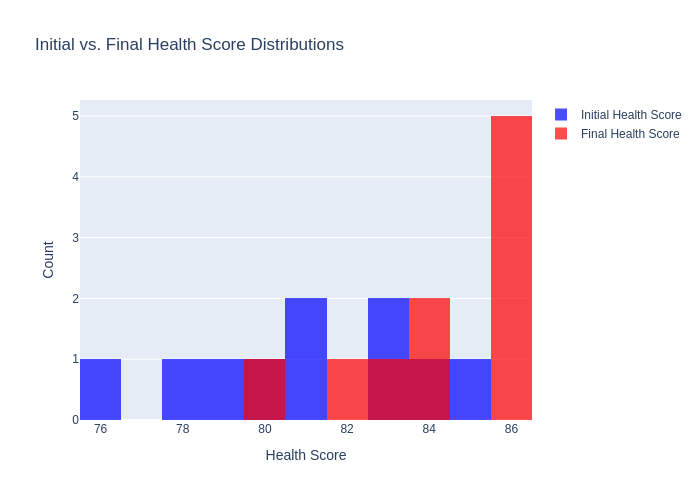

In [11]:
import plotly.graph_objects as go

trace_initial = go.Histogram(x=data['InitialHealthScore'], name='Initial Health Score', opacity=0.7, marker=dict(color='blue'), nbinsx=10)
trace_final = go.Histogram(x=data['FinalHealthScore'], name='Final Health Score', opacity=0.7, marker=dict(color='red'), nbinsx=10)

layout = go.Layout(title='Initial vs. Final Health Score Distributions', xaxis=dict(title='Health Score'), yaxis=dict(title='Count'), barmode='overlay')
fig_combined = go.Figure(data=[trace_initial, trace_final], layout=layout)
fig_combined.show(renderer='png')


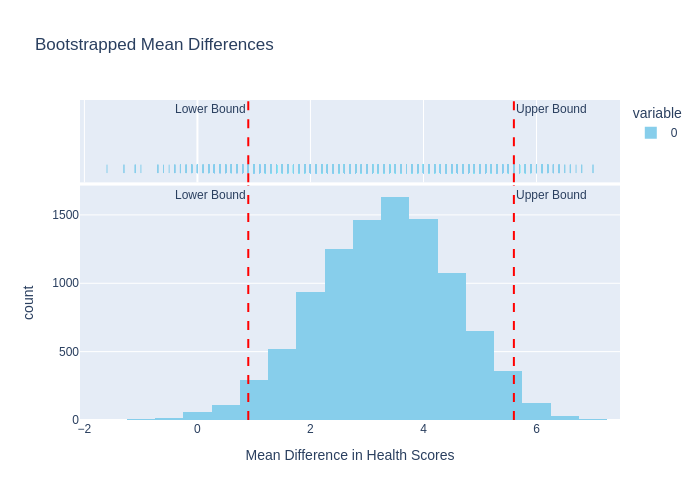

In [12]:
import numpy as np
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Calculate the differences between final and initial health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']
differences = data['HealthScoreDifference']

# Number of bootstrap samples
n_bootstraps = 10000

# Array to hold bootstrapped means
boot_means = np.empty(n_bootstraps)

# Bootstrapping: Generate resampled means
for i in range(n_bootstraps):
    boot_sample = np.random.choice(differences, size=len(differences), replace=True)
    boot_means[i] = np.mean(boot_sample)

# Create a histogram for bootstrapped means using Plotly
fig = px.histogram(boot_means, nbins=30, title="Bootstrapped Mean Differences",
                   labels={'value': 'Mean Difference in Health Scores'},
                   marginal="rug", color_discrete_sequence=['skyblue'])

# Add lines for the confidence interval
lower_bound = np.quantile(boot_means, 0.025)
upper_bound = np.quantile(boot_means, 0.975)

# Add vertical lines for the 95% CI
fig.add_vline(x=lower_bound, line_dash="dash", line_color="red", annotation_text="Lower Bound", annotation_position="top left")
fig.add_vline(x=upper_bound, line_dash="dash", line_color="red", annotation_text="Upper Bound", annotation_position="top right")

# Show the plot
fig.show(renderer='png')


By calculation and observation of the histogram, we know that 0 is not within the 95% confidence interval. Thus we can reject the null hypothesis. Moreover, as the mean difference are positive, we can infer that the vaccine has a positive effect in the patient's health.

Chatgpt session 1

Link:https://chatgpt.com/share/66fddfdb-569c-800f-bcd6-e33239d46cbb

Summary:Here is a full summary of our conversation starting from our discussions on **bootstrapping** and **standard error of the mean** up to the **vaccine data analysis assignment**:

---

### **1. Introduction to Bootstrapping and Standard Error of the Mean**

We began by discussing the concepts of **bootstrapping** and the **standard error of the mean**:

#### **Bootstrapping Process:**
- Bootstrapping is a resampling technique where we repeatedly sample with replacement from the original dataset to create many simulated samples. This helps estimate the distribution of a sample statistic (e.g., mean, median).
- The **standard error of the mean** refers to the **standard deviation** of the bootstrapped means. It quantifies the variability of the sample means across the resampled datasets.

#### **Difference between Standard Error and Standard Deviation:**
- The **standard deviation** captures the spread of the original dataset, reflecting how much individual data points vary from the sample mean.
- The **standard error of the mean** measures how much the sample mean is expected to vary if we took multiple samples from the population, and it is typically smaller than the standard deviation of the data.

### **2. Confidence Intervals Using Bootstrapped Means**

We discussed how to use the **standard error of the mean** to create a **95% confidence interval**, covering approximately 95% of the bootstrapped sample means:

#### **Confidence Interval using Standard Error:**
- A confidence interval can be constructed as:
  \[
  \text{CI} = \text{Sample Mean} \pm (2 \times \text{Standard Error of the Mean})
  \]
  
Alternatively, we explored a method using **percentiles** of the bootstrapped means:

#### **Using `np.quantile()` to Calculate CI:**
- To create a 95% confidence interval without relying on the standard error, we calculate the 2.5th and 97.5th percentiles of the bootstrapped means:
  ```python
  lower_bound = np.quantile(boot_means, 0.025)
  upper_bound = np.quantile(boot_means, 0.975)
  ```

### **3. Hypothesis Testing and Confidence Intervals**

We discussed how the overlap of a confidence interval with 0 leads to a failure to reject the null hypothesis:

#### **Null Hypothesis of No Effect:**
- If a confidence interval includes 0, this suggests that there might not be a significant difference between the sample statistic and the hypothesized value (i.e., the null hypothesis of "no effect"). Therefore, we **fail to reject the null hypothesis**.
- If the interval does not contain 0, we may **reject the null hypothesis**, suggesting that there is a statistically significant effect.

### **4. Vaccine Data Analysis Assignment**

#### **Overview:**
You provided a dataset from a company named AliTech, which developed a vaccine aimed at improving health. The dataset included patients' initial and final health scores. The goal was to assess whether the vaccine had an effect on improving the patients' health.

#### **Data:**
```plaintext
PatientID, Age, Gender, InitialHealthScore, FinalHealthScore
1, 45, M, 84, 86
2, 34, F, 78, 86
3, 29, M, 83, 80
4, 52, F, 81, 86
5, 37, M, 81, 84
6, 41, F, 80, 86
7, 33, M, 79, 86
8, 48, F, 85, 82
9, 26, M, 76, 83
10, 39, F, 83, 84
```

### **5. Creating and Saving the CSV File**

I provided two methods to save this data into a CSV file:

#### **Using pandas:**
```python
import pandas as pd

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)
df.to_csv('vaccine_data.csv', index=False)
```

### **6. Bootstrapping Analysis**

We performed bootstrapping on the **difference in health scores** (`FinalHealthScore - InitialHealthScore`) to assess whether the vaccine had a statistically significant effect:

#### **Bootstrapping Steps:**
1. Calculate the health score difference for each patient.
2. Generate **bootstrapped means** by resampling the differences with replacement.
3. Calculate a **95% confidence interval** for the bootstrapped means using the percentile method:
    ```python
    lower_bound = np.quantile(boot_means, 0.025)
    upper_bound = np.quantile(boot_means, 0.975)
    ```

### **7. Data Visualization Using Plotly**

You requested the use of **Plotly** for visualizations instead of **Matplotlib**. I provided code for the following visualizations:

#### **1. Scatter Plot**: Comparing the Initial and Final Health Scores for each patient:
```python
import plotly.graph_objs as go

trace1 = go.Scatter(x=data['PatientID'], y=data['InitialHealthScore'], mode='lines+markers', name='Initial Health Score', line=dict(color='blue'))
trace2 = go.Scatter(x=data['PatientID'], y=data['FinalHealthScore'], mode='lines+markers', name='Final Health Score', line=dict(color='red'))

layout = go.Layout(title='Initial vs. Final Health Scores', xaxis=dict(title='Patient ID'), yaxis=dict(title='Health Score'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()
```

#### **2. Histograms for Initial and Final Health Scores**:
```python
import plotly.express as px

# Initial Health Score Histogram
fig_initial = px.histogram(data, x="InitialHealthScore", nbins=10, title="Initial Health Score Distribution", color_discrete_sequence=['blue'])
fig_initial.show()

# Final Health Score Histogram
fig_final = px.histogram(data, x="FinalHealthScore", nbins=10, title="Final Health Score Distribution", color_discrete_sequence=['red'])
fig_final.show()
```

#### **3. Combined Histogram (Overlay):**
We also overlaid the histograms for the Initial and Final Health Scores for a direct comparison:
```python
import plotly.graph_objects as go

trace_initial = go.Histogram(x=data['InitialHealthScore'], name='Initial Health Score', opacity=0.7, marker=dict(color='blue'), nbinsx=10)
trace_final = go.Histogram(x=data['FinalHealthScore'], name='Final Health Score', opacity=0.7, marker=dict(color='red'), nbinsx=10)

layout = go.Layout(title='Initial vs. Final Health Score Distributions', xaxis=dict(title='Health Score'), yaxis=dict(title='Count'), barmode='overlay')
fig_combined = go.Figure(data=[trace_initial, trace_final], layout=layout)
fig_combined.show()
```

### **8. Conclusion and Hypothesis Testing**

#### **Null Hypothesis:**
- The null hypothesis in this case is that the vaccine has no effect on the patients' health (i.e., the mean difference between the final and initial health scores is 0).
  
#### **Conclusion from the Analysis:**
- If the **95% confidence interval** for the bootstrapped mean differences does not include 0, we reject the null hypothesis, concluding that the vaccine likely has a significant effect.
- Otherwise, if the interval includes 0, we fail to reject the null hypothesis, suggesting that the vaccine may not have a significant effect on health scores.

---

This summary encapsulates the key discussions, code implementations, and insights related to bootstrapping, hypothesis testing, and vaccine data analysis. Let me know if you need any further clarification!

Question 9

In [13]:
print ('"Yes" or "No" or "Somewhat" or "Mostly" or whatever')

"Yes" or "No" or "Somewhat" or "Mostly" or whatever
